# Multi-objective Optimisation

## Exercise 1
As we have discussed in the lectures, _test problems_ are a way of benchmarking the performance of an algorithm. One of the earlier multi-objective test suites was proposed by Zitzler, Deb and Thiele in 2000 ([their paper can be found here](https://sop.tik.ee.ethz.ch/publicationListFiles/zdt2000a.pdf)). The first problem in the so-called ZDT problem suite is ZDT1, and it is described as follows:
$$
\begin{eqnarray}
    f_1 & = & x_1 \\
    f_2 & = & g(\mathbf{x}) \cdot \left( 1.0 - \sqrt{\frac{f_1}{g(\mathbf{x})}}\right) \\
    g(\mathbf{x}) & = & 1.0 + \frac{9}{D-1}\sum^D_{i=2}x_i,
\end{eqnarray}
$$
where the decision vector $\mathbf{x}$ is a sequence of real values between 0 and 1 (use the ``numpy.random.rand`` function to generate a random solution - I recommend you use a 10-element array, so $D=10$).

The following two cells demonstrate the implementation of ZDT1, show how to sample a solution, and evaluate it under the two objective functions.

In [2]:
import numpy as np


def g(x):
    D = x.shape[0]
    return 1.0 + (9/(D-1)) * x[1:].sum()


def zdt1(x):
    f1 = x[0]
    f2 = g(x) * (1.0 - np.sqrt(f1 / g(x)))
    return f1, f2

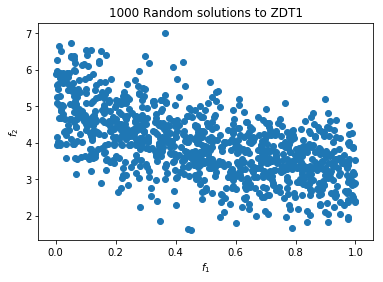

In [9]:
import matplotlib.pyplot as plt

N = 1000
X = np.random.rand(N, 10)
Y = np.array([zdt1(x) for x in X])

plt.ion()
plt.scatter(Y[:,0], Y[:,1])
plt.title("%d Random solutions to ZDT1" % N)
plt.xlabel("$f_1$")
plt.ylabel("$f_2$")
plt.show()

Another problem in the suite is ZDT2. It's definition is as follows:
$$
\begin{eqnarray}
    f_1 & = & x_1 \\
    f_2 & = & g(\mathbf{x}) \cdot \left( 1- \left(\frac{f_1}{g(\mathbf{x})}\right)^2 \right).
\end{eqnarray}
$$
The function $g(\mathbf{x})$ is the same as for ZDT1.

Write a Python function that implements the ZDT2 test problem. To implement the function $g$ you will need to use Python array slicing. This was covered in an earlier workshop, but to recap: slicing retrieves part of an array. So, to pass the elements $x_2$ to $x_D$ (remembering that mathematical statements start from 1 and array indexing in Python starts from 0) you can use the statement

``x[1:]``

to retreive the elements that are needed by the $g$ function.

ZDT1 is a __2-objective__ problem, so your function should return two numbers - one for each objective.

In [2]:
# Slicing example.
import numpy as np
x = np.arange(20)
print(x)

slice_1 = x[5:]    # Obtain the elements from index 5 onwards.
print(slice_1)

slice_2 = x[5:10]  # Obtain elements 5 to 9 (inclusive).
print(slice_2)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[5 6 7 8 9]


In [57]:
import numpy as np

def g(x):
    D = x.shape[0]
    return 1.0 + (9/(D-1)) * x[1:].sum()

# Implement ZDT2 here.
def zdt2(x):

    f1 = x[0]
    gx = g(x)

    f2 = gx * (1-(f1/gx)**2)
    
    return f1, f2

N=10
xTEST = np.random.rand(N, 3)
f1, f2 = zdt2(xTEST)
print("f1 = ", f1, ", f2 = ", f2)

    

f1 =  [0.52200801 0.5477805  0.25302604] , f2 =  [15.33597953 15.3341838  15.34955735]


## Exercise 2
Implement a Python function that evaluates the dominance relation - you may need to refer to the lecture slides to remind yourself how the dominance relation works. The Numpy array methods ``any`` and ``all`` will be of use here.

In [40]:
import numpy as np    

def dominates(u, v):
    if np.all(u < v) == True:
        return True
   
#Create some f1 and f2 values to test with
N=10
xTEST = np.random.rand(N, 3)
f1, f2 = zdt2(xTEST)
print("f1 = ", f1, ", f2 = ", f2)
result = dominates(f1, f2)
if result == True:
    print("f1 dominates f2.")
else:
    print("f2 dominates f1.")

        



f1 =  [0.07757107 0.69195977 0.17754771] , f2 =  [14.17129862 14.13793705 14.16949885]
f1 dominates f2.


## Exercise 3
Implement the non-dominated sorting algorithm described in the lecture. If you have $N$ solutions, you should return a $N$-element array in which element $i$ indicates the Pareto shell solution $i$ belongs to. For example, if solution 47 is non-dominated then ``shells[47] = 1``. If it is in the second Pareto shell, then ``shells[47] = 2``, and so on. You should make use of the dominance function from the previous question.

Some things to remember:
 - You should work on a copy of the population. So the first thing you need to do is make a copy with ``Y = X.copy()``.
 - Once you have assigned a solution to a shell it shouldn't be considered again. I recommend setting a really bad value so that it can't possibly be non-dominated again. For example, for ``M`` objectives, ``Y[i,:] = np.tile(np.inf, M)`` will set all ``M`` (2, in this case, but go for reusability!) objective values for solution ``i`` to infinity.
 - You should use a ``while`` statement to loop until all solutions have been assigned to the shells array. Make sure you include a stopping condition or it will run forever!

In [39]:
def ndsort(X):
    # I have started off the function for you - you need to implement the rest.
    Y = X.copy() # array        
    N, M = Y.shape # dimensions of the array eg, 3,1 N=3, M=1
    shells = np.zeros(N) # make an array with N 0s  shells=[0, 0, 0]
    shell = 1 # start at rank 1 
    
    i=0 #set index i to 0
    
    while 0 in shells: # while the shells array isn't filled out
        shell=1 # start testing with rank 1
        j = i+1 # set index j to i+1
        while j<=N: # from j to the length of the shells array
            isDominant = dominates(Y[j], Y[i]) # see if Yj dominates Yi
            if isDominant == True: # if it does
                shell=shell+1 # The shell increments once as it must have a higher rank                       
            j=j+1 # move to the next value of j           
        shells[i]=shell # store the current shell in the shells array
        i=i+1 # move to the next value of i
    
    return shells  


## Exercise 4
Generate 100 random solutions to the ZDT2 problem and plot the objective values using a scatter plot.

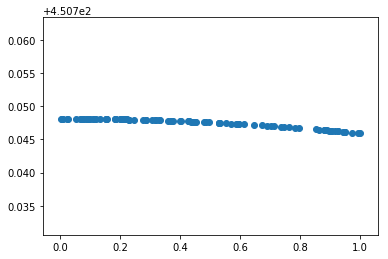

In [67]:
import matplotlib.pyplot as plt
ex4 = np.random.rand(10, 100)
a4, b4 = zdt2(ex4)
plt.scatter(a4, b4)
plt.show()

## Exercise 5
Produce a second plot. Generate a second plot of your ZDT2 solutions - this one should colour the solutions according to the Pareto shell.

You should add a [colourbar]() to your plot. To set the range properly, you will need to set the ``scatter`` function's ``vmin`` argument to 1 and its ``vmax`` argument to the largest number in your shells array, as follows:

``plt.scatter(Y[:,0], Y[:,1], c=shells, cmap="viridis", vmin=1, vmax=shells.max())``

If you have implemented this properly you will see a scatter plot in which solutions in the lower-left hand corner are coloured dark blue and those in the upper-right hand corner are yellow/green.

In [38]:
# Produce your plot here.

That is the end of the workshop. What you have done is construct the basis for a multi-objective selection operator, which could then be used within a MOEA to optimise these (or other) problems.